<a href="https://colab.research.google.com/github/shashwat9kumar/Pix2Pix_GANS_Map_to_Cityscape/blob/master/Pix2Pix_Gan_Maps_using_in_realtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib

In [ ]:
dataset_name = "maps"
_URL = f'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{dataset_name}.tar.gz'

path_to_zip = tf.keras.utils.get_file(
    fname=f"{dataset_name}.tar.gz",
    origin=_URL,
    extract=True)

path_to_zip  = pathlib.Path(path_to_zip)

PATH = path_to_zip.parent/dataset_name

In [2]:
image_path= "test_image.jpg"

In [3]:
prediction_image = tf.io.read_file(image_path)
prediction_image = tf.image.decode_image(prediction_image, channels=3)
prediction_image = tf.image.resize(prediction_image, (256, 256))
prediction_image = tf.expand_dims(prediction_image, axis=0)
prediction_image = tf.cast(prediction_image, dtype=tf.float32)
prediction_image = (prediction_image / 127.5) -1
prediction_image.shape

TensorShape([1, 256, 256, 3])

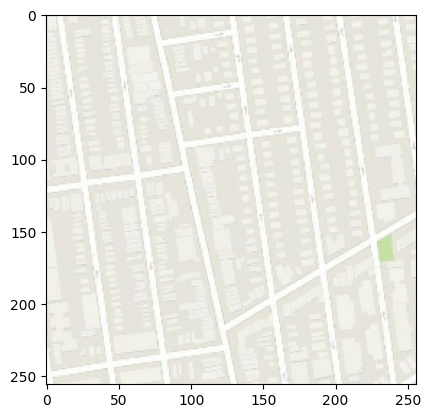

In [4]:
plt.imshow(tf.squeeze(prediction_image, axis=0)*0.5 +0.5)

In [5]:
generator = tf.keras.models.load_model("generator.h5")

In [6]:
generated_image = generator.predict(prediction_image)

1/1 [==============================] - 1s 624ms/step


In [7]:
generated_image = tf.cast(generated_image, dtype = tf.float32)

In [8]:
generated_image = tf.squeeze(generated_image, axis=0)

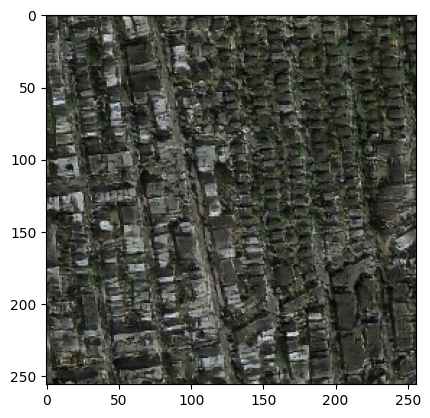

In [9]:
plt.imshow((generated_image+1)/2.0);

In [10]:
generated_image = (generated_image+1)/2.0

In [11]:
generated_image = tf.image.resize(generated_image, (1080, 1080))

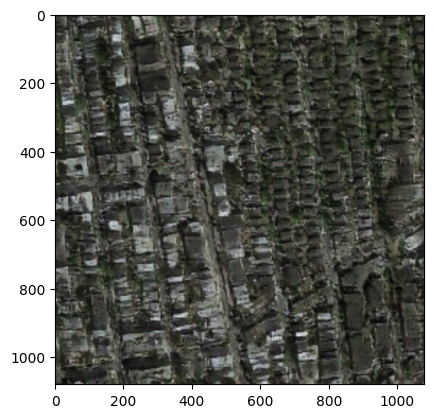

In [12]:
plt.imshow(generated_image)